**Markov Switching Regressions**: These are models that allow the parameters of a regression model to switch between different regimes over time. In a financial context, this could mean switching between high and low volatility states. These models are especially useful in capturing the dynamics of financial time series, which often exhibit regime switches. They are characterized by parameters that vary across different regimes, finite number of these regimes, and the ability for these regimes to be temporary and recurring​.

The complete Markov-switching model includes:

- An assumed number of regimes.
- A dependent variable.
- Independent variables.
- Parameters relating the dependent variable to the independent variables for each regime.
- Transition probabilities.
- Statistical inferences on the model parameters and the determined states.
- How Are Markov-Switching Models Estimated

Markov-switching models are usually estimated using:

- Maximum likelihood estimation (expectation-maximization). This method was proposed by Hamilton 1990
- Bayesian estimation (Gibbs sampler). Bayesian estimation samples from a joint distribution of the parameters, states, and transition probabilities using a Markov Chain Monte Carlo method (MCMC). This method benefits from the fact that the likelihood function for the model doesn't have to be directly calculated.

The expectations-maximization algorithm broadly involves two steps:

1. Estimating the latent variable. This is known as the E-Step.
2. Estimating the parameters of the model given the value of the latent variable. This is known as the M-step.

In the context of the Markov-Switching model, this means we:

- Use a filtering-smoothing algorithm, such as the [Kalman smoother](https://web.stanford.edu/class/ee363/lectures/kf.pdf), to propose the path of the unobserved variable.
- Use maximum likelihood, given the current regime, to estimate the model parameters, including the transition probabilities.
- Repeat steps 1 & 2 using updated parameter estimates until convergence.

***note: Unlike structural break models, regime change models use stochastic processes to drive unobserved regime changes and are suited for cyclically occurring changes in the economy***

**Inhomogeneous (Time-Varying) Markov Chains**: Traditional Markov chains have constant transition probabilities, but inhomogeneous Markov chains allow these probabilities to vary over time. This flexibility is crucial for modeling financial markets where transition probabilities change due to factors like market sentiment or economic news.

### Assumptions and Theory

**Markov Property**: The future state depends only on the current state, not on the sequence of events that preceded it.

**Regime Switching**: Assumes that the observable data is generated by a process that can switch between several unobservable states (regimes).

**Time-Variability**: Transition probabilities can change over time, influenced by external factors.

### Simulation

The process typically involves:

1. Defining the state space (e.g., low, neutral, high volatility states).
2. Estimating the model parameters, including transition probabilities.
3. Fitting the model to your data (using maximum likelihood estimation, for example).

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


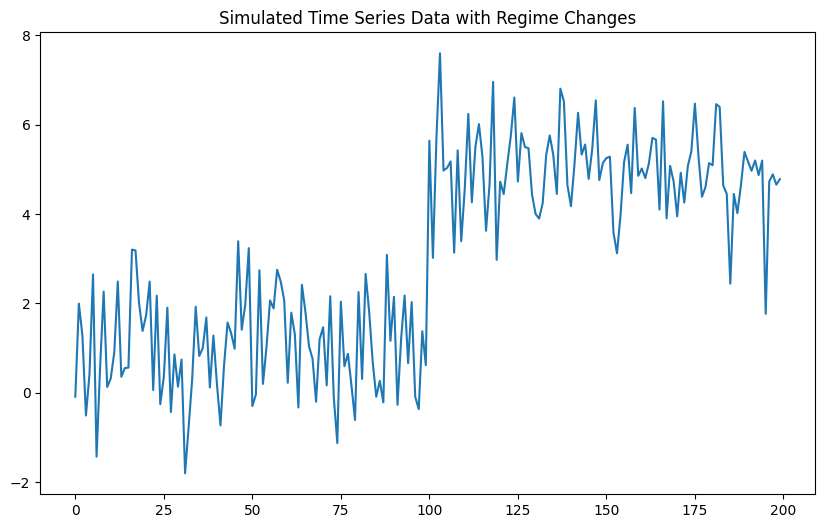

In [2]:
np.random.seed(123)  # For reproducibility

n_samples = 200
regime_change_point = 100

# Regimes: low mean and high mean
mean_regime_1 = 1
mean_regime_2 = 5

# Generating data
data = np.zeros(n_samples)
data[:regime_change_point] = mean_regime_1 + np.random.normal(0, 1, regime_change_point)
data[regime_change_point:] = mean_regime_2 + np.random.normal(0, 1, n_samples - regime_change_point)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Simulated Time Series Data with Regime Changes")
plt.show()


We'll use the MarkovAutoregression class from statsmodels to fit a Markov Switching Model to our simulated data

In [3]:
# Define the model
model = sm.tsa.MarkovAutoregression(data, k_regimes=2, order=1, switching_ar=False)

# Fit the model
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())


                         Markov Switching Model Results                         
Dep. Variable:                        y   No. Observations:                  199
Model:             MarkovAutoregression   Log Likelihood                -335.751
Date:                  Sun, 12 Nov 2023   AIC                            683.502
Time:                          17:25:17   BIC                            703.262
Sample:                               0   HQIC                           691.499
                                  - 199                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2768      0.762      2.989      0.003       0.784       3.770
                             Regime 

Here is GPT4'a breakdown of how to interpret a summary results table of these models.

```
Here's a breakdown of how to interpret the key components of this output:

Model Results Overview

Dependent Variable (y): This is the variable you're trying to predict or model.

No. Observations: The number of observations (data points) used in the model, which is 199 in your case.

Log Likelihood: This is the log-likelihood of the fitted model. A higher value generally indicates a better fit.

AIC (Akaike Information Criterion): This is used to compare models; a lower AIC suggests a better model.

BIC (Bayesian Information Criterion): Similar to AIC, it's used for model comparison, but penalizes complex models more harshly. Lower BIC is better.

HQIC (Hannan-Quinn Information Criterion): Another criterion for model comparison, with a balance between AIC and BIC. Lower values indicate a better model.

Regime Parameters

Regime 0 and 1 Parameters: These are the coefficients for each regime. Your model assumes two different regimes (states) in the data.

const: The constant (mean level) for each regime. For Regime 0, the constant is approximately 2.277, and for Regime 1, it's around 4.012.

std err: This is the standard error of the coefficient estimates, indicating the level of uncertainty.

z: The z-score, which is the coefficient divided by its standard error.

P>|z|: The p-value associated with the z-score. A low p-value (typically < 0.05) suggests that the coefficient is statistically significant.

[0.025 0.975]: The 95% confidence interval for the coefficient estimates.

Non-switching Parameters

sigma2: The variance of the error term (residuals). A lower value indicates less unexplained variation in the model.

ar.L1: The coefficient for the first lag in the autoregression. Your model is an AR(1) model, meaning it includes one lag. The coefficient of 0.909 suggests a strong positive relationship with the previous value in the series.

Warnings

Covariance Matrix Calculation: Indicates the method used for computing the covariance matrix. In your case, it was calculated using numerical (complex-step) differentiation, which is a method for estimating derivatives numerically.

Interpretation

The model identifies two regimes in your data with different mean levels (2.277 and 4.012).

The autoregressive part (AR(1)) is strong, suggesting that past values are good predictors of current values in the series.

The low p-values for the coefficients indicate that these findings are statistically significant.

The error term variance (sigma2) is relatively small, suggesting the model explains a good portion of the variability in the data.
```

After fitting the model, we can plot the in-sample fitted values and the probabilities of being in each regime to evaluate the performance of our model.

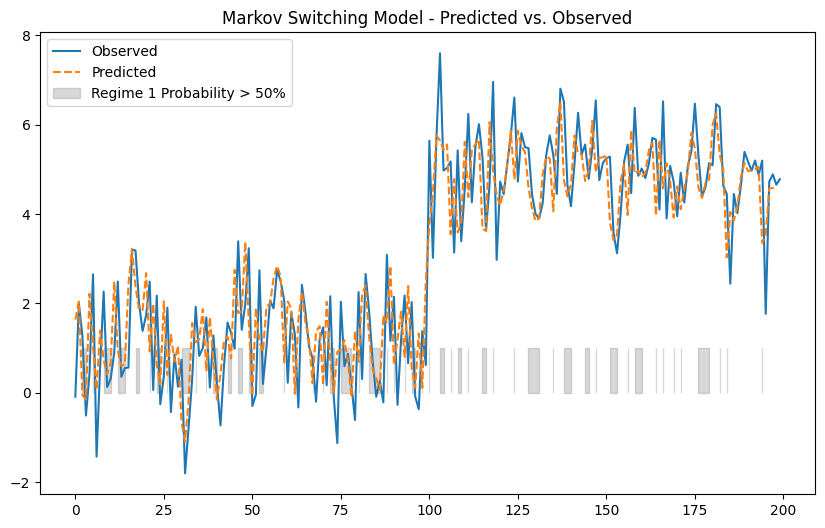

In [5]:
# Predicted values
predicted_values = fitted_model.predict()

# Regime probabilities
regime_probs = fitted_model.smoothed_marginal_probabilities

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observed')
plt.plot(predicted_values, label='Predicted', linestyle='dashed')
plt.title('Markov Switching Model - Predicted vs. Observed')

# Adding regime probability plot
plt.fill_between(range(len(regime_probs)), 0, 1, where=regime_probs[:, 0] > 0.5, color='gray', alpha=0.3, label='Regime 1 Probability > 50%')
plt.legend()
plt.show()


In [11]:
# From the estimated transition matrix we can calculate the expected duration of a low regime versus a high regime.
fitted_model.expected_durations

array([1.87027869, 2.13285191])

In [2]:
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import areturns

dta_areturns = pd.Series(
    areturns, index=pd.date_range("2004-05-04", "2014-5-03", freq="W")
)

# Plot the data
dta_areturns.plot(title="Absolute returns, S&P500", figsize=(12, 3))

# Fit the model
mod_areturns = sm.tsa.MarkovRegression(
    dta_areturns.iloc[1:],
    k_regimes=2,
    exog=dta_areturns.iloc[:-1],
    switching_variance=True,
)
res_areturns = mod_areturns.fit()



ModuleNotFoundError: No module named 'pytest'